In [1]:
%pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 722.9/722.9 kB 17.2 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/working'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
import os
import ultralytics
from ultralytics import YOLO
ultralytics.checks()

Ultralytics YOLOv8.1.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5519.7/8062.4 GB disk)


In [4]:
HOME = os.getcwd()
print(HOME)

/kaggle/working


In [5]:
# Create a new YOLO model from scratch
model = YOLO('yolov8n.yaml')

# Load a pretrained YOLO model (recommended for training)
model = YOLO('yolov8n.pt')

100%|██████████| 6.23M/6.23M [00:00<00:00, 117MB/s]


In [6]:
model.info()

YOLOv8n summary: 225 layers, 3157200 parameters, 0 gradients, 8.9 GFLOPs


(225, 3157200, 0, 8.8575488)

In [7]:
# Train the model using first dataset
results1 = model.train(data= '/kaggle/input/all-brain-mris/All Brain MRIs.yaml', epochs=200, device='0', weight_decay=0.00065, patience=200, auto_augment= 'autoaugment', optimizer= 'Adam', lr0= 0.001, lrf=0.05, dropout= 0.2)

Ultralytics YOLOv8.1.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/input/all-brain-mris/All Brain MRIs.yaml, epochs=200, time=None, patience=200, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.2, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=T

100%|██████████| 755k/755k [00:00<00:00, 24.3MB/s]
2024-03-23 18:08:43,923	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-23 18:08:44,741	INFO util.py:124 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-03-23 18:08:46.934791: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-23 18:08:46.934915: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-23 18:08:47.060192: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS facto

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/all-brain-mris/labels/train... 1017 images, 15 backgrounds, 0 corrupt: 100%|██████████| 1032/1032 [00:02<00:00, 493.10it/s]

train: WARNING ⚠️ Cache directory /kaggle/input/all-brain-mris/labels is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/all-brain-mris/labels/test... 84 images, 0 backgrounds, 0 corrupt: 100%|██████████| 84/84 [00:00<00:00, 433.16it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/all-brain-mris/labels is not writeable, cache not saved.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: Adam(lr=0.001, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.00065), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      2.36G      1.378       2.73      1.202         12        640: 100%|██████████| 65/65 [00:14<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.84it/s]

                   all         84         87       0.42      0.616      0.429      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      2.33G      1.205      1.572      1.139          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]

                   all         84         87      0.489      0.649      0.487      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      2.33G      1.115      1.416      1.095         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]

                   all         84         87      0.447      0.809      0.475      0.329



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      2.32G      1.133      1.403      1.126         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]

                   all         84         87       0.43      0.727      0.495      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      2.33G      1.122       1.34      1.109          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]

                   all         84         87      0.469      0.913      0.559      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      2.33G      1.109      1.314      1.092         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         84         87      0.443      0.826      0.538      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      2.33G       1.11      1.281      1.084         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         84         87       0.48      0.836      0.544      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      2.32G      1.096      1.272      1.087          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.92it/s]

                   all         84         87      0.434      0.738      0.479      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      2.33G      1.067      1.268      1.075         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]

                   all         84         87      0.467      0.827      0.543      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      2.33G      1.047      1.253      1.068         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]

                   all         84         87       0.47      0.804      0.554      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      2.33G      1.062      1.243       1.07          8        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.51it/s]

                   all         84         87      0.471       0.88      0.536       0.39



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      2.32G      1.061      1.206      1.061         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]

                   all         84         87       0.47      0.804      0.498      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      2.33G      1.041      1.177      1.056         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]

                   all         84         87      0.471      0.912      0.501      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      2.33G      1.047      1.187       1.06         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.49it/s]

                   all         84         87      0.464      0.899      0.565       0.42



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      2.33G      1.023       1.17      1.047         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]

                   all         84         87      0.463       0.87      0.497      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      2.32G       1.01      1.143      1.037         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]

                   all         84         87      0.474      0.854      0.522      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      2.33G     0.9965      1.153      1.028         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.55it/s]

                   all         84         87      0.434      0.896      0.536      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      2.33G      1.019       1.15      1.051         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         84         87      0.453      0.841      0.541      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      2.33G      1.002      1.119      1.045          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]

                   all         84         87      0.464      0.804      0.578      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      2.32G     0.9978      1.128      1.042         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]

                   all         84         87      0.529      0.735      0.605      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      2.33G      1.008      1.108      1.043          7        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all         84         87      0.466      0.901      0.658      0.498



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      2.33G     0.9779      1.083      1.027         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.16it/s]

                   all         84         87      0.474      0.797      0.597      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      2.33G     0.9611      1.085      1.018         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         84         87      0.462      0.871      0.483      0.331



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      2.32G     0.9682      1.101      1.018         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]

                   all         84         87      0.474      0.836      0.587      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      2.33G     0.9721      1.062      1.019         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]

                   all         84         87      0.537      0.718      0.543      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      2.33G     0.9326      1.059      1.003         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]

                   all         84         87      0.446      0.896      0.488      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      2.33G     0.9555      1.037      1.009         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]

                   all         84         87      0.486       0.87      0.517      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      2.32G      0.943      1.039      1.014          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         84         87      0.488      0.798       0.53      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      2.33G     0.9611      1.035      1.023         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         84         87      0.535      0.691       0.66      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      2.33G     0.9345      1.032      1.004          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]

                   all         84         87      0.517      0.801      0.595      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      2.33G     0.9536      1.016      1.028         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]

                   all         84         87      0.436      0.798      0.511      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      2.32G     0.9725      1.027       1.02         22        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]

                   all         84         87      0.437      0.902      0.491      0.343



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      2.33G     0.9105     0.9883     0.9964         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]

                   all         84         87       0.47      0.896      0.588      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      2.33G     0.9471      1.013      1.011          8        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]

                   all         84         87      0.458      0.761      0.563      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      2.33G     0.9325     0.9872       1.01         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]

                   all         84         87      0.396       0.76      0.445      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      2.32G       0.93     0.9807      1.008         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]

                   all         84         87      0.447       0.88      0.497       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      2.33G     0.9382      0.969      1.007         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.10it/s]

                   all         84         87      0.485      0.855       0.54      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      2.33G     0.9047      0.947      1.003         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]

                   all         84         87      0.451       0.89      0.534      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      2.33G     0.9372     0.9728       1.02         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         84         87      0.487      0.877      0.522       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      2.32G     0.9049     0.9111     0.9913         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]

                   all         84         87      0.461      0.899      0.508      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      2.33G     0.9087     0.9472      1.001         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]

                   all         84         87      0.462      0.842      0.497      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      2.33G     0.9006     0.9335     0.9961         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]

                   all         84         87      0.562      0.826      0.679      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      2.33G     0.8966     0.9102     0.9871         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         84         87      0.458      0.761      0.545      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      2.32G     0.9024     0.9045     0.9957         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]

                   all         84         87      0.459      0.771        0.5      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      2.33G     0.8835     0.8945     0.9922         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]

                   all         84         87      0.504      0.776      0.543       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      2.33G     0.8865     0.9112      1.003         21        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         84         87      0.404      0.914      0.471      0.332



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      2.33G     0.8781     0.8843     0.9863         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.81it/s]

                   all         84         87      0.447      0.817      0.593      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      2.32G     0.8694       0.86     0.9805         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         84         87      0.493      0.814      0.525      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      2.33G      0.879      0.857      0.988         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all         84         87      0.406      0.784      0.468       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      2.33G     0.9054     0.8978          1         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]

                   all         84         87      0.572      0.761      0.667      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      2.33G     0.8794     0.8805     0.9854         17        640: 100%|██████████| 65/65 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.04it/s]

                   all         84         87      0.491      0.841      0.633      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      2.32G     0.8958      0.842     0.9929         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]

                   all         84         87      0.428      0.727      0.478      0.335



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      2.33G     0.8871     0.8329     0.9968         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         84         87      0.457      0.715      0.626      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      2.33G     0.8629      0.824     0.9723         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]

                   all         84         87      0.483      0.905      0.571      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      2.33G     0.8773      0.807      0.983         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.53it/s]

                   all         84         87      0.453      0.836      0.524      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      2.32G     0.8718     0.8319     0.9896         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         84         87      0.475      0.744      0.541       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      2.33G     0.8439     0.8266     0.9774          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         84         87      0.478      0.691      0.563      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      2.33G     0.8592     0.8213      0.983         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]

                   all         84         87      0.551      0.792      0.601      0.424



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      2.33G     0.8699     0.8141     0.9733         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]

                   all         84         87      0.465      0.742      0.536      0.383



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      2.32G      0.849     0.7885     0.9749         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         84         87      0.465      0.785      0.512      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      2.33G     0.8473     0.7653     0.9748         17        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]

                   all         84         87      0.481       0.87      0.606      0.419



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      2.33G     0.8526     0.7791     0.9774         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]

                   all         84         87      0.436      0.798       0.49       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      2.33G      0.851     0.7861     0.9771         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.75it/s]

                   all         84         87      0.452      0.789      0.524      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      2.32G     0.8722     0.7313     0.9761         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]

                   all         84         87      0.525      0.825      0.642      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      2.33G     0.8637     0.7348     0.9758         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]

                   all         84         87      0.502      0.798       0.58       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      2.33G     0.8184     0.7302     0.9629         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

                   all         84         87      0.454      0.833      0.521      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      2.33G     0.8277     0.7366      0.961         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         84         87      0.489      0.751       0.58      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      2.32G     0.8062     0.6937     0.9486         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]

                   all         84         87      0.473       0.77      0.586      0.406



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      2.33G     0.8127     0.7025     0.9542         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]

                   all         84         87      0.524      0.774      0.624      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      2.33G     0.8258     0.7129     0.9586         21        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         84         87      0.751       0.63      0.739      0.549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      2.33G     0.8011      0.667     0.9518         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         84         87      0.552      0.733      0.631      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      2.32G     0.8176     0.6795     0.9578         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]

                   all         84         87      0.527      0.709       0.61      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      2.33G     0.8029     0.6616      0.948         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.33it/s]

                   all         84         87      0.461      0.761      0.514       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      2.33G     0.8263     0.7094     0.9666          8        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]

                   all         84         87       0.55      0.823      0.679      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      2.33G     0.8035     0.6805     0.9611         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.46it/s]

                   all         84         87      0.592      0.705      0.691      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      2.32G     0.8231      0.694     0.9722         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         84         87       0.56      0.663      0.585      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      2.33G     0.8298     0.6885     0.9598         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         84         87      0.574      0.845      0.713       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      2.33G      0.831      0.673      0.972          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         84         87      0.556      0.699      0.639      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      2.33G     0.8111     0.6451     0.9525         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.18it/s]

                   all         84         87      0.594      0.841      0.727      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      2.32G     0.8103     0.6221     0.9538         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.98it/s]

                   all         84         87      0.584      0.727      0.645      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      2.33G     0.7991     0.6169     0.9513         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         84         87       0.55      0.773      0.671      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      2.33G     0.8138      0.628     0.9587         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.62it/s]

                   all         84         87      0.475      0.813      0.515       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      2.33G     0.7935     0.6436     0.9464         17        640: 100%|██████████| 65/65 [00:11<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         84         87      0.531      0.884      0.655      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      2.32G     0.8013     0.6482     0.9542          7        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]

                   all         84         87      0.505      0.557      0.516      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      2.33G     0.7897     0.6457      0.948         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]

                   all         84         87      0.518      0.798      0.604      0.438



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      2.33G      0.793     0.6021     0.9495          7        640: 100%|██████████| 65/65 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]

                   all         84         87      0.567       0.78      0.642      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      2.33G     0.7883     0.6217     0.9391         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.91it/s]

                   all         84         87      0.522      0.778      0.624      0.421



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      2.32G     0.7814     0.5929     0.9392          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]

                   all         84         87      0.677      0.674      0.744       0.53



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      2.33G     0.7786      0.585      0.942         19        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]

                   all         84         87      0.493      0.817      0.611      0.431



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      2.33G     0.7753     0.5857     0.9395         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.96it/s]

                   all         84         87      0.591      0.823      0.705      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      2.33G     0.7874     0.5848     0.9384         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         84         87      0.539      0.849      0.681      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      2.32G     0.7841     0.5952     0.9389         22        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         84         87       0.51      0.737      0.615      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      2.33G     0.7552     0.5747     0.9464         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]

                   all         84         87      0.635      0.667      0.646      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      2.33G     0.7526     0.5709      0.934         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]

                   all         84         87      0.561      0.868      0.712      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      2.33G      0.778      0.601     0.9477         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.30it/s]

                   all         84         87      0.554      0.759      0.663      0.467



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      2.32G     0.7731     0.5761     0.9519         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.17it/s]

                   all         84         87      0.603      0.676      0.693       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      2.33G     0.7682     0.5672     0.9398          8        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.65it/s]

                   all         84         87      0.644      0.758      0.753      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      2.33G     0.7603     0.5709     0.9364         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all         84         87      0.675      0.815       0.78      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      2.33G      0.766     0.5933      0.946         20        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.26it/s]

                   all         84         87      0.531      0.845      0.644       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      2.32G     0.7651     0.5771     0.9301          7        640: 100%|██████████| 65/65 [00:11<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.49it/s]

                   all         84         87      0.627      0.757      0.687      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      2.33G     0.7873     0.5557     0.9526         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]

                   all         84         87      0.518      0.865      0.646       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      2.33G     0.7439     0.5479     0.9343         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]

                   all         84         87      0.578       0.87      0.691      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      2.33G     0.7486      0.559     0.9369         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.67it/s]

                   all         84         87      0.592      0.637      0.632      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      2.32G     0.7711      0.606     0.9329          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]

                   all         84         87      0.574      0.822      0.701      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      2.33G     0.7372     0.5622     0.9291          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]

                   all         84         87      0.543      0.746      0.598      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      2.33G     0.7521     0.5554     0.9407         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]

                   all         84         87      0.623      0.727      0.684      0.477



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      2.33G     0.7406     0.5426     0.9367          8        640: 100%|██████████| 65/65 [00:11<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all         84         87      0.503      0.834      0.601      0.425



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      2.32G     0.7222     0.5429      0.924         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         84         87      0.563      0.835       0.65      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      2.33G     0.7691     0.5558     0.9337         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]

                   all         84         87      0.638      0.778      0.724      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      2.33G       0.75     0.5384     0.9395         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.79it/s]

                   all         84         87      0.648      0.737      0.735      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      2.33G     0.7597     0.5245      0.942         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]

                   all         84         87      0.703      0.708      0.762      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      2.32G     0.7476     0.5148     0.9319         14        640: 100%|██████████| 65/65 [00:12<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]

                   all         84         87      0.654       0.72      0.721      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      2.33G     0.7301     0.4979     0.9335         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.23it/s]

                   all         84         87      0.646      0.729      0.696      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      2.33G     0.7399      0.515     0.9212         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.24it/s]

                   all         84         87        0.6      0.817      0.753      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      2.33G     0.7023     0.4979     0.9224         17        640: 100%|██████████| 65/65 [00:11<00:00,  5.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]

                   all         84         87      0.694      0.608      0.685      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      2.32G     0.7245     0.5084     0.9194         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         84         87      0.541      0.767      0.607      0.427



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      2.33G     0.7093     0.4982     0.9221         20        640: 100%|██████████| 65/65 [00:11<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.90it/s]

                   all         84         87      0.555      0.765      0.617      0.444



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      2.33G      0.726     0.5087     0.9209         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.41it/s]

                   all         84         87      0.655      0.758      0.745      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      2.33G     0.7441     0.5124     0.9367         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.85it/s]

                   all         84         87      0.469      0.715      0.559      0.386



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      2.32G     0.7036     0.4977     0.9242         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.08it/s]

                   all         84         87       0.64      0.718      0.695      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      2.33G     0.7188      0.499     0.9322         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         84         87      0.705      0.709      0.731      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      2.33G     0.7107     0.4925     0.9315         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]

                   all         84         87      0.612      0.753      0.679      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      2.33G     0.7118     0.5147     0.9245         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         84         87      0.665      0.732      0.713      0.507



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      2.32G     0.7068     0.4955     0.9188         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         84         87      0.546      0.755      0.626      0.435



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      2.33G      0.697     0.4951     0.9118         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.22it/s]

                   all         84         87      0.616      0.799        0.7      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      2.33G     0.7102     0.4828     0.9234         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.74it/s]

                   all         84         87      0.673      0.716      0.705      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      2.33G     0.7058      0.492     0.9081         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all         84         87      0.639      0.785        0.7      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      2.32G     0.7015     0.4936     0.9196         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         84         87      0.498      0.774      0.581      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      2.33G     0.7032     0.4682     0.9162         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         84         87      0.616      0.689      0.648       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      2.33G     0.6932     0.4758     0.9058          8        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.05it/s]

                   all         84         87      0.641      0.735      0.657       0.45



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      2.33G     0.6957     0.4803     0.9268         19        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.21it/s]

                   all         84         87      0.709      0.713      0.771      0.545



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      2.32G      0.716     0.4755     0.9216         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]

                   all         84         87      0.673      0.719       0.74       0.51



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      2.33G     0.7038     0.4727     0.9253         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.42it/s]

                   all         84         87      0.611      0.754      0.659      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      2.33G     0.7024     0.4755     0.9147         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]

                   all         84         87      0.631      0.726      0.725      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      2.33G     0.6908     0.4518     0.9126         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.25it/s]

                   all         84         87      0.545      0.819      0.616      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      2.32G     0.6876     0.4707     0.9182         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         84         87      0.554      0.842      0.656      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      2.33G     0.6864     0.4695     0.9093         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         84         87      0.604      0.675      0.642      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      2.33G     0.6881     0.4741     0.9178         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]

                   all         84         87      0.711      0.772      0.738      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      2.33G     0.6921     0.4626     0.9255         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.37it/s]

                   all         84         87      0.617      0.777      0.719      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      2.32G     0.6847      0.456     0.9074         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.19it/s]

                   all         84         87      0.614      0.817      0.754      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      2.33G     0.6552     0.4343     0.8987         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]

                   all         84         87      0.632      0.808      0.781      0.547



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      2.33G     0.6691     0.4396     0.9059         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.99it/s]

                   all         84         87      0.648      0.629      0.691      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      2.33G     0.6727     0.4574     0.9042         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.72it/s]

                   all         84         87      0.568      0.792       0.68      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      2.32G      0.685     0.4546     0.9153         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]

                   all         84         87      0.674      0.648      0.692      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      2.33G     0.6678      0.459      0.908         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.24it/s]

                   all         84         87      0.581      0.846      0.691       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      2.33G     0.6738     0.4531     0.9038         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.31it/s]

                   all         84         87      0.627      0.788      0.714      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      2.33G     0.6762     0.4541     0.9157         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         84         87      0.641      0.805      0.712      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      2.32G     0.6706     0.4362     0.9106         17        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         84         87      0.697      0.781      0.775      0.548



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      2.33G     0.6552     0.4219     0.9043         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         84         87      0.716      0.771      0.767      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      2.33G     0.6579     0.4303     0.9044          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         84         87      0.686      0.712      0.693      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      2.33G     0.6708     0.4287     0.9103         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]

                   all         84         87      0.712      0.664      0.736      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      2.32G     0.6595     0.4221     0.9102          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.65it/s]

                   all         84         87      0.653      0.815      0.775      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      2.33G     0.6432     0.4245     0.9043         19        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.18it/s]

                   all         84         87      0.665      0.693      0.727      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      2.33G     0.6381     0.4211     0.8998         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]

                   all         84         87      0.721      0.738      0.725      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      2.33G     0.6548      0.432      0.904         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]

                   all         84         87      0.642      0.762      0.707      0.508



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      2.32G     0.6406     0.4164     0.9014          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.34it/s]

                   all         84         87      0.603      0.715      0.673      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      2.33G     0.6503     0.4139     0.9055         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.93it/s]

                   all         84         87      0.769      0.701      0.704      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      2.33G     0.6569     0.4272      0.906         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.48it/s]

                   all         84         87      0.667      0.731      0.692      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      2.33G     0.6256     0.4117     0.8943          7        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]

                   all         84         87      0.673       0.71      0.706      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      2.32G     0.6318      0.419     0.8912         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]

                   all         84         87      0.614       0.75      0.696      0.495



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      2.33G     0.6406     0.4143     0.9042         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

                   all         84         87      0.636      0.763      0.717      0.502



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      2.33G     0.6182     0.4262     0.8965         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.40it/s]

                   all         84         87      0.733      0.698       0.75      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      2.33G     0.6301     0.4146     0.9052         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.71it/s]

                   all         84         87      0.593      0.816      0.716      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      2.32G     0.6206     0.4066     0.8914         19        640: 100%|██████████| 65/65 [00:11<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.73it/s]

                   all         84         87      0.674      0.721       0.68      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      2.33G     0.6345     0.4098     0.9048         16        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         84         87      0.582      0.817      0.669      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      2.33G      0.621     0.3947     0.8997         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.50it/s]

                   all         84         87      0.745      0.695      0.746      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      2.33G     0.6293     0.3986     0.8914         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]

                   all         84         87      0.696      0.797      0.751      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      2.32G     0.6058     0.3861     0.8825         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.89it/s]

                   all         84         87       0.74       0.72      0.711      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      2.33G     0.6138     0.3881     0.8928         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.07it/s]

                   all         84         87      0.621      0.741      0.717      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      2.33G     0.6286     0.4147     0.8995          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.20it/s]

                   all         84         87      0.603      0.842      0.725      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      2.33G     0.6101     0.3914     0.8885         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.28it/s]

                   all         84         87      0.623      0.834      0.735      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      2.32G     0.6221     0.3993      0.899         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all         84         87      0.682      0.731      0.747      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      2.33G     0.6067     0.3867     0.8881         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.66it/s]

                   all         84         87       0.79      0.738        0.8      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      2.33G     0.6312     0.4064     0.8976         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]

                   all         84         87      0.779       0.71      0.787      0.557



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      2.33G     0.6163     0.3956     0.8968         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.54it/s]

                   all         84         87      0.673      0.735      0.743       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      2.32G     0.6141     0.3927     0.8987          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.06it/s]

                   all         84         87      0.628      0.809       0.72      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      2.33G     0.6141     0.3811     0.8881         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.58it/s]

                   all         84         87      0.638      0.732      0.673      0.478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      2.33G     0.5984      0.385     0.8927         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.15it/s]

                   all         84         87      0.668      0.854      0.781      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      2.33G     0.6148     0.3819     0.8945          8        640: 100%|██████████| 65/65 [00:11<00:00,  5.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.35it/s]

                   all         84         87      0.715      0.718      0.741      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      2.32G     0.5998     0.3812     0.8935         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.47it/s]

                   all         84         87      0.628      0.806      0.715      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      2.33G     0.5999     0.3719     0.8924         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.14it/s]

                   all         84         87      0.715      0.711      0.729      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      2.33G     0.5922     0.3758     0.8765         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.38it/s]

                   all         84         87       0.68      0.761      0.738      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      2.33G     0.6006     0.3741     0.8907         12        640: 100%|██████████| 65/65 [00:11<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]

                   all         84         87      0.665      0.812      0.732      0.517



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      2.32G      0.587      0.368     0.8906         14        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.54it/s]

                   all         84         87      0.637      0.842      0.726      0.512



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      2.33G     0.5787     0.3582     0.8773         18        640: 100%|██████████| 65/65 [00:11<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]

                   all         84         87      0.657      0.789      0.749      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      2.33G      0.579      0.352     0.8898         15        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.64it/s]

                   all         84         87      0.689      0.759      0.751      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      2.33G     0.6068     0.3759     0.8964          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.43it/s]

                   all         84         87       0.67      0.817      0.747      0.527



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      2.32G     0.5966     0.3746     0.8883          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.01it/s]

                   all         84         87      0.667      0.789      0.726      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      2.33G      0.569     0.3684     0.8824         13        640: 100%|██████████| 65/65 [00:11<00:00,  5.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.45it/s]

                   all         84         87      0.686      0.722      0.705      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      2.33G     0.5882      0.368     0.8834         11        640: 100%|██████████| 65/65 [00:11<00:00,  5.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.13it/s]

                   all         84         87       0.65      0.712       0.67       0.47


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      2.33G     0.5283     0.3116     0.8517          8        640: 100%|██████████| 65/65 [00:12<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.57it/s]

                   all         84         87      0.624      0.792      0.675      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      2.32G     0.5139     0.2866     0.8462         10        640: 100%|██████████| 65/65 [00:11<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.27it/s]

                   all         84         87        0.6      0.773      0.664      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      2.33G     0.4866     0.2778     0.8385          8        640: 100%|██████████| 65/65 [00:11<00:00,  5.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.02it/s]

                   all         84         87      0.585      0.782      0.662      0.456



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      2.33G     0.4997     0.2795     0.8448          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.36it/s]

                   all         84         87      0.609       0.79      0.684      0.492



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      2.33G     0.4863     0.2762     0.8316          8        640: 100%|██████████| 65/65 [00:11<00:00,  5.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.69it/s]

                   all         84         87      0.671       0.76      0.703      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      2.32G     0.4864       0.27     0.8296          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.61it/s]

                   all         84         87      0.712      0.741      0.714      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      2.33G     0.4689     0.2649      0.829          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.39it/s]

                   all         84         87      0.672      0.782      0.721      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      2.33G      0.476     0.2648     0.8331          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.56it/s]

                   all         84         87      0.631      0.842       0.73       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      2.33G     0.4698     0.2672     0.8266          8        640: 100%|██████████| 65/65 [00:11<00:00,  5.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.71it/s]

                   all         84         87       0.64      0.788      0.706      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      2.32G      0.476     0.2631      0.825          9        640: 100%|██████████| 65/65 [00:11<00:00,  5.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.29it/s]

                   all         84         87      0.662      0.745      0.689      0.495



200 epochs completed in 0.724 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.32 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
Model summary (fused): 168 layers, 3006038 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.00it/s]


                   all         84         87      0.778      0.709      0.789      0.559
              negative         84         59      0.851      0.776      0.862      0.658
              positive         84         28      0.705      0.643      0.716       0.46
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train


In [8]:

results3 = model.predict(source=['/kaggle/input/test-images/BB.jpg','/kaggle/input/test-images/CC.jpg'])
i=0
# Process results list
for result in results3:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    result.show()  # display to screen
    i += 1
    result.save(filename=f'result-{i}.jpg')  # save to disk


0: 640x640 1 negative, 29.0ms
1: 640x640 1 positive, 29.0ms
Speed: 2.4ms preprocess, 29.0ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.4254], device='cuda:0')
data: tensor([[249.1320,  70.2229, 357.8630, 184.1312,   0.4254,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (590, 589)
shape: torch.Size([1, 6])
xywh: tensor([[303.4975, 127.1770, 108.7310, 113.9083]], device='cuda:0')
xywhn: tensor([[0.5153, 0.2156, 0.1846, 0.1931]], device='cuda:0')
xyxy: tensor([[249.1320,  70.2229, 357.8630, 184.1312]], device='cuda:0')
xyxyn: tensor([[0.4230, 0.1190, 0.6076, 0.3121]], device='cuda:0')
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([1.], device='cuda:0')
conf: tensor([0.9182], device='cuda:0')
data: tensor([[551.2762, 264.5552, 696.6833, 433.3276,   0.9182,   1.0000]], device='cuda:0')
id: None
is_track: False
orig_sh

Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmp4mafjukx.PNG'


In [9]:
import matplotlib.pyplot as plt
from PIL import Image


Error: no "view" mailcap rules found for type "image/png"
/usr/bin/xdg-open: 869: www-browser: not found
/usr/bin/xdg-open: 869: links2: not found
/usr/bin/xdg-open: 869: elinks: not found
/usr/bin/xdg-open: 869: links: not found
/usr/bin/xdg-open: 869: lynx: not found
/usr/bin/xdg-open: 869: w3m: not found
xdg-open: no method available for opening '/tmp/tmp1q13rn0v.PNG'


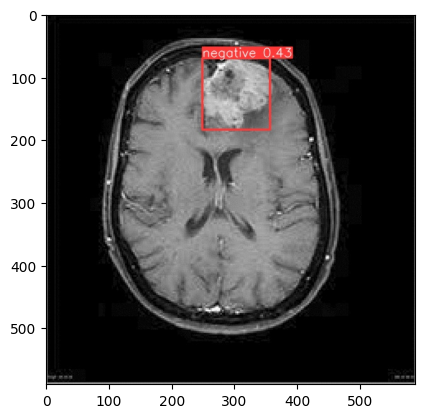

In [10]:
image1= Image.open('/kaggle/working/result-1.jpg')
plt.imshow(image1)

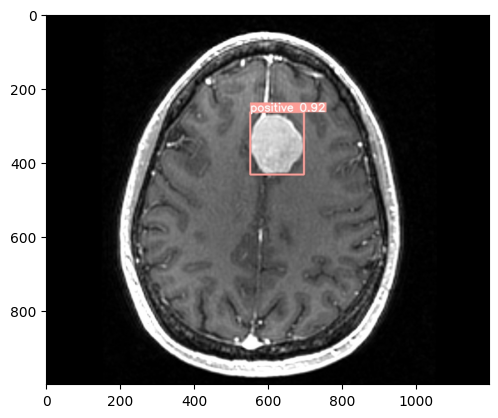

In [11]:
image2= Image.open('/kaggle/working/result-2.jpg')
plt.imshow(image2)